In [1]:
import numpy as np
from algo import numf
from peaks import get_neighbors
import matplotlib.pyplot as plt

In [2]:
def gauss(x, sigma=1, mean=0, scale=1):
    return scale * np.exp(-np.square(x - mean) / (2 * sigma ** 2))

m = 100
r = 3
p1 = 24
p2 = 50
p3 = 76

x = np.linspace(1, m, m).reshape(-1, 1)
w1 = gauss(x, sigma=2, mean=p1)
w2 = np.concatenate((np.zeros((int((m - p2) / 2), 1)), np.ones((p2, 1)), np.zeros((int((m - p2) / 2), 1))))
w3 = gauss(x, sigma=2, mean=p3)
Wtrue = np.hstack((w1, w2, w3))


n = 6
c = 1/np.sqrt(r-1)
e = 0.001
Htrue = np.array([[c + e, 1-c-e, 0],
                  [1-c-e, c+e, 0],
                  [c+e, 0, 1-c-e],
                  [1-c-e, 0, c+e],
                  [0, c+e, 1-c-e],
                  [0, 1-c-e, c+e]]).T

M = Wtrue @ Htrue

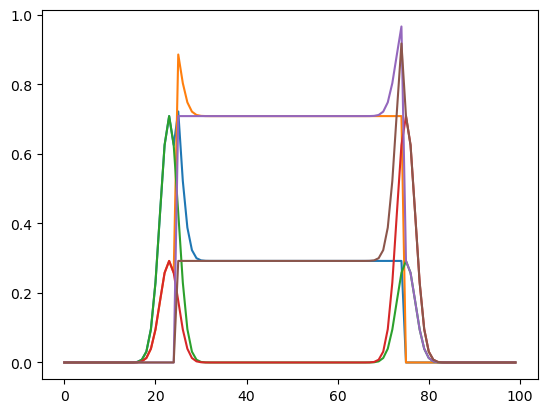

In [3]:
plt.plot(M)

In [4]:
W0 = np.random.rand(m, r)
H0 = np.random.rand(r, n)

In [5]:
pvals = get_neighbors([p1, p2, p3], m, 5)
pvals

[71, 73, 75, 45, 77, 47, 79, 49, 81, 19, 51, 21, 53, 23, 55, 25, 27, 29]

In [6]:
W, H, pouts = numf(M, W0, H0, pvals, iters=20)

0.9811258433285164
0.8169454752835743
0.33501706221941674
0.31642731570250204
0.29995191508422187
0.28985842745845114
0.2815360490921408
0.274916202622295
0.2703496809338342
0.2660554449189416
0.263380303382836
0.26108785924229516
0.25916168656977134
0.2576041656966389
0.2563141433202582
0.25520672941992933
0.253968149132087
0.2530344488982747
0.2521100884269093
0.25104812545627003


In [7]:
from multigrid import create_R, get_fine_p

R1 = create_R(m)

In [8]:
W0 = np.random.rand(m, r)
H0 = np.random.rand(r, n)

W1, H1, pouts1 = numf(R1 @ M, R1 @ W0, H0, iters=20)

0.9377614602044312
0.3125055124910319
0.2986120802740559
0.26179204244068477
0.2409657699576794
0.2366079141426178
0.23475108330858627
0.23282649991964854
0.23100676346296609
0.22977878057214243
0.22843124766382947
0.22714420176894431
0.22584298744445475
0.22465865691688444
0.22348148000488688
0.22234421414579628
0.22117442077314767
0.2199695322391554
0.21882280573143717
0.21773787241069553


In [9]:
pvals = get_fine_p(pouts1)
pvals = get_neighbors(pvals, m, 5)
pvals

[65, 67, 69, 71, 73, 75, 13, 45, 15, 47, 17, 49, 19, 51, 21, 53, 23, 55]

In [10]:
W2, H2, pouts2 = numf(M, W0, H0, pvals=pvals, iters=16)

0.9707618780424093
0.41789229432905783
0.34245233794234836
0.33289875022942833
0.3272472901283073
0.3233722894100936
0.3201562033679654
0.317193592034445
0.31428371288086737
0.3115365076640151
0.30884499896249235
0.3061474726043225
0.3037894089038234
0.3022470910094114
0.3005629111012133
0.29904490195360034


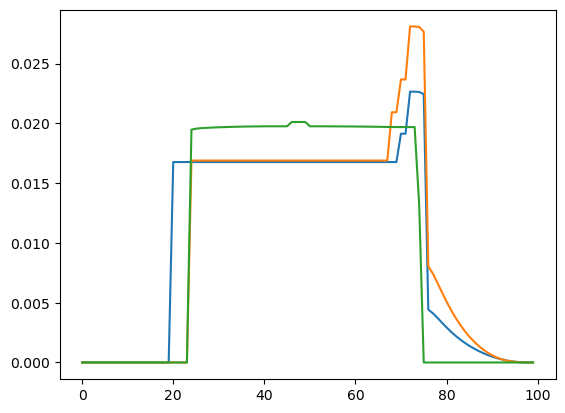

In [11]:
plt.plot(W2)